# <font color='white' size='30'>**Los Angeles Crime Data Dive**</font>

<div style="background-color: #18C0C4; padding: 0px; color: #18C0C4;">

<div style="background-color: #; padding: 0px; color: #18C0C4;">

## <font color='white' size='10'><i>**Plan**</i></font> <font size='5'><i>→ Acquire → Prepare → Explore → Model → Deliver</i></font>

<font color='18C0C4' size='10'> 

--- 

<i>The original CSV files did not contain HIPAA information. They did however contain some pharmacy employee information and prescription numbers.</i>

<font color='white' size='5'>

- Used Discern Analytics - Defense Health Agnecy (DHA) reporting tool 

- I pulled pharmacy data for the previous year (October 1, 2022 to September 27, 2023)

<font color='white' size='5'>

**With this data, I intend to find out:** </font>

- Are certain days of the week busier than others at the pharmacy?

- Are there trends during certain times of the month for patients to pick up meds? (After payday?)

- Are certain medications seasonal?
   
- Is there enough of a difference in seasonal medications, that we should increase supply?

<div style="background-color: #; padding: 0px; color: #18C0C4;">

## <font size='5'><i>Plan → </i></font> <font color='white' size='10'><i>**Acquire**</i></font> <font size='5'><i> → Prepare → Explore → Model → Deliver</i></font>

<font color='18C0C4' size='10'> 

--- 

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
def check_columns(DataFrame, reports=False, graphs=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe.
    """
    print(f"Total rows: {DataFrame.shape[0]}")
    print(f"Total columns: {DataFrame.shape[1]}")
    if reports:
        describe = DataFrame.describe().round(2)
        print(describe)
    if graphs:
        DataFrame.hist(figsize=(10, 10))
        plt.subplots_adjust(hspace=0.5)
        plt.show()

    data = []
    for column in DataFrame.columns:
        dtype = DataFrame[column].dtype
        unique_vals = DataFrame[column].unique()
        num_unique = DataFrame[column].nunique()
        num_null = DataFrame[column].isna().sum()
        pct_null = DataFrame[column].isna().mean().round(5)

        if pd.api.types.is_numeric_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            mean_val = DataFrame[column].mean().round(2)
            range_vals = (min_val, max_val, mean_val)
        else:
            range_vals = None

        data.append(
            [column, dtype, num_unique, num_null, pct_null, unique_vals, range_vals]
        )

    return pd.DataFrame(
        data,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

In [93]:
# Load the dataset
data1 = pd.read_csv("crime_data_2010_2019.csv")
data2 = pd.read_csv("crime_data_2020_2023.csv")

# Concat the 2
data = pd.concat([data1, data2])

In [94]:
# Cache the combined CSV
data.to_csv("crime_data_2010_2023.csv")

<div style="background-color: #; padding: 0px; color: #18C0C4;">

## <font size='5'><i>Plan → Acquire → </i></font> <font color='white' size='10'><i>**Prepare**</i></font> <font size='5'><i> → Explore → Model → Deliver</i></font>

<font color='18C0C4' size='10'> 

--- 

In prepare, since we could potentially be trying to find trends in volume of crime, I found it important only drop rows if we absolutely have to. Most nulls will be assigned to 'Unknown'.

---
### Surface Level Prep Using Univariate Analysis

Total rows: 1614754
Total columns: 28
              DR_NO    TIME OCC        AREA  Rpt Dist No    Part 1-2  \
count  1.614754e+06  1614754.00  1614754.00   1614754.00  1614754.00   
mean   2.158850e+08     1335.49       10.71      1117.79        1.41   
std    1.074677e+07      654.14        6.09       609.25        0.49   
min    8.170000e+02        1.00        1.00       101.00        1.00   
25%    2.101192e+08      900.00        6.00       622.00        1.00   
50%    2.201087e+08     1415.00       11.00      1142.00        1.00   
75%    2.219051e+08     1900.00       16.00      1617.00        2.00   
max    2.399165e+08     2359.00       21.00      2199.00        2.00   

           Crm Cd    Vict Age   Premis Cd  Weapon Used Cd    Crm Cd 1  \
count  1614754.00  1614754.00  1614736.00       562348.00  1614734.00   
mean       500.75       29.84      305.74          362.88      500.49   
std        207.83       21.77      216.59          123.72      207.61   
min        110.00    

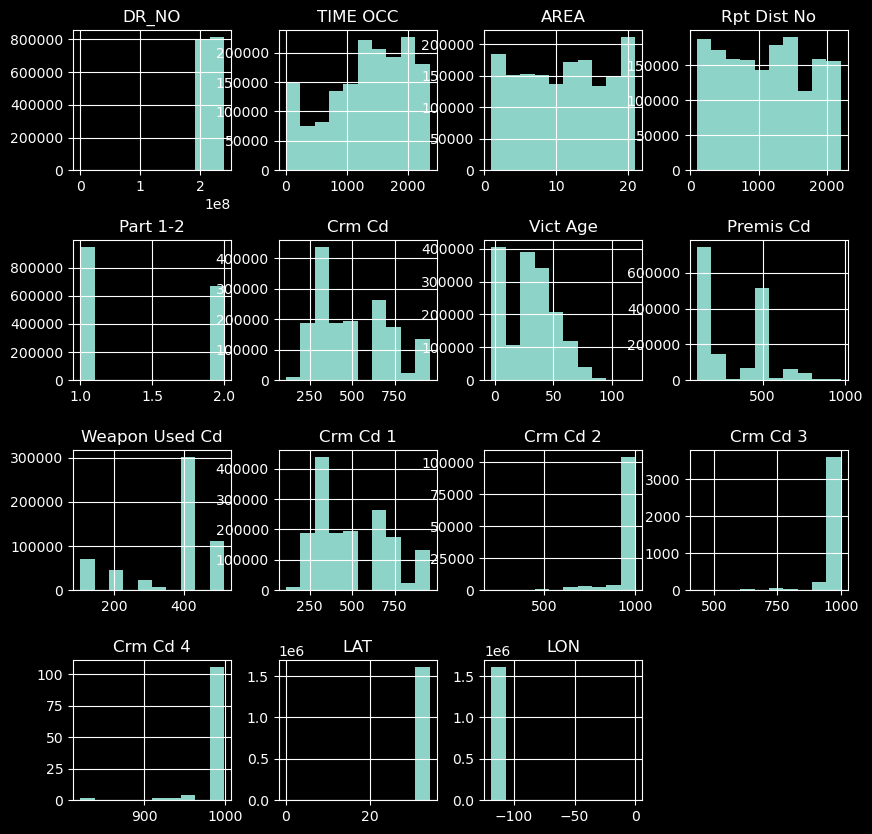

,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,DR_NO,int64,807377,0,0.00000,"[10304468, 190101086, 200110444, 191501505, 19...","(817, 239916487, 215885045.12)"
1,Date Rptd,object,1364,0,0.00000,"[01/08/2020 12:00:00 AM, 01/02/2020 12:00:00 A...",None
2,DATE OCC,object,1364,0,0.00000,"[01/08/2020 12:00:00 AM, 01/01/2020 12:00:00 A...",None
3,TIME OCC,int64,1439,0,0.00000,"[2230, 330, 1200, 1730, 415, 30, 1315, 40, 200...","(1, 2359, 1335.49)"
4,AREA,int64,21,0,0.00000,"[3, 1, 15, 19, 17, 11, 5, 9, 10, 8, 7, 14, 2, ...","(1, 21, 10.71)"
5,AREA NAME,object,21,0,0.00000,"[Southwest, Central, N Hollywood, Mission, Dev...",None
6,Rpt Dist No,int64,1204,0,0.00000,"[377, 163, 155, 1543, 1998, 161, 101, 1708, 19...","(101, 2199, 1117.79)"
7,Part 1-2,int64,2,0,0.00000,"[2, 1]","(1, 2, 1.41)"
8,Crm Cd,int64,138,0,0.00000,"[624, 845, 745, 740, 121, 442, 946, 341, 330, ...","(110, 956, 500.75)"
9,Crm Cd Desc,object,138,0,0.00000,"[BATTERY - SIMPLE ASSAULT, SEX OFFENDER REGIST...",None


In [95]:
check_columns(data, graphs=True, reports=True)

---
### Logically Rename Columns

In [96]:
# Get all the columns names in a nice copy & paste format for ease
data.columns.to_list()

['DR_NO',
 'Date Rptd',
 'DATE OCC',
 'TIME OCC',
 'AREA',
 'AREA NAME',
 'Rpt Dist No',
 'Part 1-2',
 'Crm Cd',
 'Crm Cd Desc',
 'Mocodes',
 'Vict Age',
 'Vict Sex',
 'Vict Descent',
 'Premis Cd',
 'Premis Desc',
 'Weapon Used Cd',
 'Weapon Desc',
 'Status',
 'Status Desc',
 'Crm Cd 1',
 'Crm Cd 2',
 'Crm Cd 3',
 'Crm Cd 4',
 'LOCATION',
 'Cross Street',
 'LAT',
 'LON']

In [97]:
# Rename logically to evalute nulls and such
data = data.rename(
    columns={
        "DR_NO": "dragnet_number",
        "Date Rptd": "date_reported",
        "DATE OCC": "date_occurred",
        "TIME OCC": "time_occurred",
        "AREA": "area_id",
        "AREA NAME": "area_name",
        "Rpt Dist No": "report_district",
        "Part 1-2": "part_1_2",
        "Crm Cd": "crime_code",
        "Crm Cd Desc": "crime_code_description",
        "Mocodes": "modus_operandi_code",
        "Vict Age": "victim_age",
        "Vict Sex": "victim_sex",
        "Vict Descent": "victim_descent",
        "Premis Cd": "premise_code",
        "Premis Desc": "premise_description",
        "Weapon Used Cd": "weapon_used_code",
        "Weapon Desc": "weapon_description",
        "Status": "status",
        "Status Desc": "status_description",
        "Crm Cd 1": "crime_code_1",
        "Crm Cd 2": "crime_code_2",
        "Crm Cd 3": "crime_code_3",
        "Crm Cd 4": "crime_code_4",
        "LOCATION": "location",
        "Cross Street": "cross_street",
        "LAT": "lat",
        "LON": "lon",
        "AREA ": "area_id",
    }
)

---
### Choose columns to work with

In [98]:
check_columns(data)

Total rows: 1614754
Total columns: 28


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,dragnet_number,int64,807377,0,0.00000,"[10304468, 190101086, 200110444, 191501505, 19...","(817, 239916487, 215885045.12)"
1,date_reported,object,1364,0,0.00000,"[01/08/2020 12:00:00 AM, 01/02/2020 12:00:00 A...",None
2,date_occurred,object,1364,0,0.00000,"[01/08/2020 12:00:00 AM, 01/01/2020 12:00:00 A...",None
3,time_occurred,int64,1439,0,0.00000,"[2230, 330, 1200, 1730, 415, 30, 1315, 40, 200...","(1, 2359, 1335.49)"
4,area_id,int64,21,0,0.00000,"[3, 1, 15, 19, 17, 11, 5, 9, 10, 8, 7, 14, 2, ...","(1, 21, 10.71)"
5,area_name,object,21,0,0.00000,"[Southwest, Central, N Hollywood, Mission, Dev...",None
6,report_district,int64,1204,0,0.00000,"[377, 163, 155, 1543, 1998, 161, 101, 1708, 19...","(101, 2199, 1117.79)"
7,part_1_2,int64,2,0,0.00000,"[2, 1]","(1, 2, 1.41)"
8,crime_code,int64,138,0,0.00000,"[624, 845, 745, 740, 121, 442, 946, 341, 330, ...","(110, 956, 500.75)"
9,crime_code_description,object,138,0,0.00000,"[BATTERY - SIMPLE ASSAULT, SEX OFFENDER REGIST...",None


In [99]:
# Drop columns we won't be using due to project scale and time

data = data[
    [
        "date_reported",
        "date_occurred",
        "time_occurred",
        "area_name",
        "part_1_2",
        "crime_code_description",
        "victim_age",
        "victim_sex",
        "victim_descent",
        "premise_description",
        "weapon_description",
        "location",
        "lat",
        "lon",
    ]
]

---
### Columns not used

<b>With more time, could be useful to go back and try to clean</b>

- `modus_operandi_code`
- `status_description`
- `report_district`
- `dragnet_number`
- `status`  

<b>Redundant/Numerical Codes of Data</b>
      
- `crime_code`
- `premise_code`       
- `weapon_used_code`    
- `crime_code_1`
- `crime_code_2`
- `crime_code_3`
- `crime_code_4`
- `area_id`

<b>Too many Nulls</b>

- `cross_street`

In [100]:
check_columns(data)

Total rows: 1614754
Total columns: 14


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,date_reported,object,1364,0,0.00000,"[01/08/2020 12:00:00 AM, 01/02/2020 12:00:00 A...",None
1,date_occurred,object,1364,0,0.00000,"[01/08/2020 12:00:00 AM, 01/01/2020 12:00:00 A...",None
2,time_occurred,int64,1439,0,0.00000,"[2230, 330, 1200, 1730, 415, 30, 1315, 40, 200...","(1, 2359, 1335.49)"
3,area_name,object,21,0,0.00000,"[Southwest, Central, N Hollywood, Mission, Dev...",None
4,part_1_2,int64,2,0,0.00000,"[2, 1]","(1, 2, 1.41)"
5,crime_code_description,object,138,0,0.00000,"[BATTERY - SIMPLE ASSAULT, SEX OFFENDER REGIST...",None
6,victim_age,int64,103,0,0.00000,"[36, 25, 0, 76, 31, 23, 29, 35, 41, 24, 34, 46...","(-3, 120, 29.84)"
7,victim_sex,object,5,211818,0.13118,"[F, M, X, nan, H, -]",None
8,victim_descent,object,20,211834,0.13119,"[B, H, X, W, A, O, nan, C, F, K, I, V, Z, J, P...",None
9,premise_description,object,306,952,0.00059,"[SINGLE FAMILY DWELLING, SIDEWALK, POLICE FACI...",None


---
### Deeper Preparation

Preparation plans after pulling out relevant columns:


- Change time occurred to 4 digit 24 hour time, maybe datetime?

- Looks like we have negative values in the victim_age. We will most likely drop those

- We'll have to map victim_sex. We can assume F = Female, M = Male, X = Non binary. Due to large amount of other values, we will make them 'unknown'.

- We'll map the victim_descent based on abbreviations and assign nulls 'unknown'

- Very small amount of nulls in premise_description (0.00023). We'll assign them 'unknown'.

- 66% Nulls in weapon_description, we'll fill them with 'No Weapon'.

- We'll bin the weapons into categories

---
### Fix Time Occurred
Change time occurred to 4 digit 24 hour time, maybe datetime?

In [101]:
# Convert date columns to datetime format
data["date_reported"] = pd.to_datetime(
    data["date_reported"], format="%m/%d/%Y %I:%M:%S %p"
)
data["date_occurred"] = pd.to_datetime(
    data["date_occurred"], format="%m/%d/%Y %I:%M:%S %p"
)

# Change the time occurred to 4 digit 24 hour time
data["time_occurred"] = data["time_occurred"].astype(str).str.zfill(4)

# Change time_occurred to be date time, but only the time
data["time_occurred"] = pd.to_datetime(data["time_occurred"], format="%H%M").dt.time

# Sanity check
data["time_occurred"].value_counts(normalize=True)

time_occurred
12:00:00    0.035567
18:00:00    0.026647
17:00:00    0.025127
20:00:00    0.024655
19:00:00    0.022880
              ...   
05:59:00    0.000025
05:44:00    0.000025
23:32:00    0.000022
05:34:00    0.000020
05:31:00    0.000015
Name: proportion, Length: 1439, dtype: float64

In [102]:
# Add time_occurred to the date_occurred as an hour

data["date_occurred"] = data["date_occurred"] + pd.to_timedelta(
    data["time_occurred"].astype(str)
)

In [103]:
# Move date occurred to the index and sort

data = data.set_index("date_occurred").sort_index()

---
### Fix Victim Age 
Looks like we have negative values in the victim_age. We will have to drop those

In [104]:
# Show value counts for victim age
data["victim_age"].value_counts(normalize=True)

victim_age
 0      0.246065
 30     0.022831
 35     0.022328
 31     0.021882
 29     0.021834
          ...   
 97     0.000074
-1      0.000068
-2      0.000015
-3      0.000001
 120    0.000001
Name: proportion, Length: 103, dtype: float64

In [105]:
# Show only negative values
data[data["victim_age"] < 0]

,date_reported,time_occurred,area_name,part_1_2,crime_code_description,victim_age,victim_sex,victim_descent,premise_description,weapon_description,location,lat,lon
date_occurred,,,,,,,,,,,,,
2020-01-01 00:05:00,2023-07-12,00:05:00,West LA,2,"EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",-3,X,X,OTHER BUSINESS,NaN,CENTURY PARK,34.0630,-118.4159
2020-01-01 00:05:00,2023-07-12,00:05:00,West LA,2,"EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",-3,X,X,OTHER BUSINESS,NaN,CENTURY PARK,34.0630,-118.4159
2020-01-01 12:00:00,2021-05-19,12:00:00,West Valley,1,BURGLARY,-1,M,O,SINGLE FAMILY DWELLING,NaN,4100 GREENBRIAR LN,34.1459,-118.5350
2020-01-01 12:00:00,2021-02-05,12:00:00,Pacific,1,THEFT PLAIN - PETTY ($950 & UNDER),-1,X,X,OTHER BUSINESS,NaN,13100 MINDANAO WY,33.9855,-118.4373
2020-01-01 12:00:00,2021-02-05,12:00:00,Pacific,1,THEFT PLAIN - PETTY ($950 & UNDER),-1,X,X,OTHER BUSINESS,NaN,13100 MINDANAO WY,33.9855,-118.4373
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01 12:00:00,2023-03-24,12:00:00,Northeast,2,THEFT OF IDENTITY,-1,X,X,OTHER BUSINESS,NaN,4200 VERDANT ST,34.1315,-118.2657
2022-01-01 13:45:00,2023-02-21,13:45:00,Devonshire,2,THEFT OF IDENTITY,-1,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,18600 PARTHENIA ST,34.2282,-118.5383
2022-01-01 13:45:00,2023-02-21,13:45:00,Devonshire,2,THEFT OF IDENTITY,-1,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,18600 PARTHENIA ST,34.2282,-118.5383


In [106]:
# Drop negative ages, no way to impute
data = data[data["victim_age"] >= 0]

---
### Fix Victim Descent
We'll map the victim_descent based on abbreviations and assign nulls 'unknown'

In [107]:
# Label them to the full name
descent_categories = {
    "H": "Hispanic",
    "W": "White",
    "O": "Unknown",
    "B": "Black",
    "A": "Asian",
    "X": "Unknown",
    "F": "Filipino",
    "K": "Korean",
    "C": "Chinese",
    "U": "Pacific Islander",
    "J": "Japanese",
    "V": "Vietnamese",
    "I": "American Indian/Alaskan Native",
    "G": "Guamanian",
    "P": "Asian Indian",
    "Z": "Asian Indian",
    "S": "Samoan",
    "D": "Cambodian",
    "L": "Laotian",
    "N": "Asian Indian",
    " ": "Unknown",
    "-": "Unknown",
}

# Map the vict descent to the full name
data["victim_descent"] = data["victim_descent"].map(
    lambda desc: descent_categories.get(desc, "Unknown")
)

In [108]:
# Sanity Check
data["victim_descent"].value_counts()

victim_descent
Hispanic                          495576
Unknown                           494674
White                             329658
Black                             230430
Asian                              35356
Korean                              8594
Filipino                            6720
Chinese                             6178
Japanese                            2246
Vietnamese                          1660
American Indian/Alaskan Native      1530
Asian Indian                        1248
Pacific Islander                     332
Cambodian                            118
Guamanian                            110
Laotian                               98
Samoan                                90
Name: count, dtype: int64

---
### Fix Victim Sex
We'll have to map victim_sex. We can assume F = Female, M = Male, X = Non binary. Due to large amount of other values, we will make them 'unknown'.

In [109]:
# Show the value counts of victim_sex
print(data["victim_sex"].value_counts(dropna=False))

victim_sex
M      667334
F      595268
NaN    211818
X      140018
H         178
-           2
Name: count, dtype: int64


In [110]:
# Replace any values in the victim_sex column that aren't "M", "F", or "X" with "Unknown"
data.loc[~data["victim_sex"].isin(["M", "F", "X"]), "victim_sex"] = "Unknown"

In [111]:
# Show the value counts of victim_sex
print(data["victim_sex"].value_counts(dropna=False))

victim_sex
M          667334
F          595268
Unknown    211998
X          140018
Name: count, dtype: int64


---
### Nulls in premise_description 
Very small amount of nulls in premise_description (0.00023). We'll assign them 'unknown'.

In [112]:
# Show the nulls in premise_description
data[data["premise_description"].isna()]

,date_reported,time_occurred,area_name,part_1_2,crime_code_description,victim_age,victim_sex,victim_descent,premise_description,weapon_description,location,lat,lon
date_occurred,,,,,,,,,,,,,
2020-01-02 02:35:00,2020-01-21,02:35:00,77th Street,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,X,Unknown,NaN,NaN,1600 W FLORENCE AV,33.9790,-118.3112
2020-01-02 02:35:00,2020-01-21,02:35:00,77th Street,1,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0,X,Unknown,NaN,NaN,1600 W FLORENCE AV,33.9790,-118.3112
2020-01-10 22:00:00,2020-01-10,22:00:00,Wilshire,1,ATTEMPTED ROBBERY,0,X,Unknown,NaN,HAND GUN,5100 VENICE BL,34.0451,-118.3504
2020-01-10 22:00:00,2020-01-10,22:00:00,Wilshire,1,ATTEMPTED ROBBERY,0,X,Unknown,NaN,HAND GUN,5100 VENICE BL,34.0451,-118.3504
2020-01-13 01:40:00,2020-01-14,01:40:00,Van Nuys,2,TRESPASSING,45,M,White,NaN,NaN,14400 VENTURA BL,34.1505,-118.4458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-15 19:00:00,2023-09-16,19:00:00,Newton,1,BURGLARY,0,M,White,NaN,NaN,1700 GRIFFITH AV,34.0269,-118.2525
2023-09-17 03:42:00,2023-09-17,03:42:00,Foothill,1,BURGLARY,0,X,Unknown,NaN,VEHICLE,9700 GLENOAKS BL,34.2459,-118.3834
2023-09-17 03:42:00,2023-09-17,03:42:00,Foothill,1,BURGLARY,0,X,Unknown,NaN,VEHICLE,9700 GLENOAKS BL,34.2459,-118.3834


In [113]:
# Reassign nulls in premise description to unknown
data["premise_description"] = data["premise_description"].fillna("Unknown")

---
### Weapon_description 
66% Nulls in weapon_description, we'll fill them with 'No Weapon'.

In [114]:
# Fill nulls in weapon with no weapon
data["weapon_description"] = data["weapon_description"].fillna("No Weapon")

---
### Weapon_category
Make a weapon bin out of all of the weapon_descriptions

In [115]:
# View all the different weapons
data["weapon_description"].unique()

array(['No Weapon', 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'VERBAL THREAT', 'UNKNOWN WEAPON/OTHER WEAPON',
       'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'ANTIQUE FIREARM',
       'HAND GUN', 'BLUNT INSTRUMENT', 'SEMI-AUTOMATIC PISTOL',
       'UNKNOWN FIREARM', 'BOTTLE', 'KNIFE WITH BLADE 6INCHES OR LESS',
       'UNKNOWN TYPE CUTTING INSTRUMENT', 'MACE/PEPPER SPRAY',
       'AUTOMATIC WEAPON/SUB-MACHINE GUN', 'FOLDING KNIFE',
       'BELT FLAILING INSTRUMENT/CHAIN', 'REVOLVER', 'OTHER KNIFE',
       'STICK', 'CLUB/BAT', 'SCISSORS', 'OTHER FIREARM',
       'PHYSICAL PRESENCE', 'VEHICLE', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN',
       'OTHER CUTTING INSTRUMENT', 'FIRE', 'BOMB THREAT', 'MACHETE',
       'ROCK/THROWN OBJECT', 'CONCRETE BLOCK/BRICK', 'PIPE/METAL PIPE',
       'KITCHEN KNIFE', 'BRASS KNUCKLES', 'SIMULATED GUN', 'TOY GUN',
       'SCREWDRIVER', 'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE',
       'CAUSTIC CHEMICAL/POISON', 'STUN GUN', 'FIXED OBJECT', 'S

In [116]:
# Change all the weapons to categories
weapon_categories = {
    "No Weapon": ["No Weapon"],
    "Firearm": [
        "M1-1 SEMIAUTOMATIC ASSAULT RIFLE",
        "SEMI-AUTOMATIC PISTOL",
        "HAND GUN",
        "SIMULATED GUN",
        "UNKNOWN FIREARM",
        "SHOTGUN",
        "AIR PISTOL/REVOLVER/RIFLE/BB GUN",
        "REVOLVER",
        "ASSAULT WEAPON/UZI/AK47/ETC",
        "ANTIQUE FIREARM",
        "SEMI-AUTOMATIC RIFLE",
        "RIFLE",
        "HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE",
        "MAC-11 SEMIAUTOMATIC ASSAULT WEAPON",
        "SAWED OFF RIFLE/SHOTGUN",
        "HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE",
        "UZI SEMIAUTOMATIC ASSAULT RIFLE",
        "UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE",
        "M-14 SEMIAUTOMATIC ASSAULT RIFLE",
        "AUTOMATIC WEAPON/SUB-MACHINE GUN",
        "STARTER PISTOL/REVOLVER",
        "MAC-10 SEMIAUTOMATIC ASSAULT WEAPON",
        "RELIC FIREARM",
        "OTHER FIREARM",
    ],
    "Bladed/Sharp Object": [
        "MACHETE",
        "OTHER CUTTING INSTRUMENT",
        "FOLDING KNIFE",
        "OTHER KNIFE",
        "KNIFE WITH BLADE 6INCHES OR LESS",
        "ICE PICK",
        "KNIFE WITH BLADE OVER 6 INCHES IN LENGTH",
        "KITCHEN KNIFE",
        "SWITCH BLADE",
        "DIRK/DAGGER",
        "BOWIE KNIFE",
        "STRAIGHT RAZOR",
        "CLEAVER",
        "RAZOR BLADE",
        "SCISSORS",
        "AXE",
        "UNKNOWN TYPE CUTTING INSTRUMENT",
        "SWORD",
        "RAZOR",
        "SCREWDRIVER",
        "BOW AND ARROW",
        "SYRINGE",
    ],
    "Blunt Instrument": [
        "STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",
        "ROCK/THROWN OBJECT",
        "BLUNT INSTRUMENT",
        "BOTTLE",
        "CLUB/BAT",
        "STICK",
        "PIPE/METAL PIPE",
        "HAMMER",
        "BELT FLAILING INSTRUMENT/CHAIN",
        "TIRE IRON",
        "CONCRETE BLOCK/BRICK",
        "BOARD",
        "BLACKJACK",
        "BRASS KNUCKLES",
    ],
    "Threats": [
        "UNKNOWN WEAPON/OTHER WEAPON",
        "VERBAL THREAT",
        "PHYSICAL PRESENCE",
        "DEMAND NOTE",
        "BOMB THREAT",
    ],
    "Other": [
        "VEHICLE",
        "GLASS",
        "MACE/PEPPER SPRAY",
        "STUN GUN",
        "EXPLOXIVE DEVICE",
        "DOG/ANIMAL (SIC ANIMAL ON)",
        "SCALDING LIQUID",
        "ROPE/LIGATURE",
        "TOY GUN",
        "CAUSTIC CHEMICAL/POISON",
        "MARTIAL ARTS WEAPONS",
        "LIQUOR/DRUGS",
        "FIRE",
        "FIXED OBJECT",
    ],
}

In [117]:
# Map the weapon descriptions to their categories
data["weapon_category"] = data["weapon_description"].map(
    lambda desc: next(
        (cat for cat, weapons in weapon_categories.items() if desc in weapons),
        "Unknown",
    )
)

In [118]:
# Sanity check
data["weapon_category"].value_counts()

weapon_category
No Weapon              1052278
Blunt Instrument        330968
Threats                 102636
Firearm                  70098
Bladed/Sharp Object      41992
Other                    16646
Name: count, dtype: int64

---
### Create report_delay column
Take the date of reporting, subtract the reported date

In [119]:
# Make a new column by subtracting date occurred minus date reported
data["time_to_report"] = data["date_reported"] - data.index

# Round time_to_report to the closest day
data["time_to_report"] = data["time_to_report"].dt.round("D")

# If a value is negative, make it 0 days
data.loc[
    data["time_to_report"] < pd.Timedelta(days=0), "time_to_report"
] = pd.Timedelta(days=0)

# Value counts for time to report
data["time_to_report"].value_counts()

time_to_report
0 days       1084292
1 days        132222
2 days         72708
3 days         41036
4 days         32348
              ...   
825 days           2
1027 days          2
1228 days          2
1160 days          2
653 days           2
Name: count, Length: 1173, dtype: int64

---
### Final Look at prepped DF

In [120]:
check_columns(data)

Total rows: 1614618
Total columns: 15


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,date_reported,datetime64[ns],1364,0,0.0,"[2020-06-12 00:00:00, 2022-03-16 00:00:00, 202...",None
1,time_occurred,object,1439,0,0.0,"[00:01:00, 00:05:00, 00:10:00, 00:15:00, 00:20...",None
2,area_name,object,21,0,0.0,"[Hollenbeck, Wilshire, Devonshire, Harbor, Van...",None
3,part_1_2,int64,2,0,0.0,"[2, 1]","(1, 2, 1.41)"
4,crime_code_description,object,138,0,0.0,"[SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION ...",None
5,victim_age,int64,100,0,0.0,"[17, 0, 20, 13, 59, 16, 25, 11, 12, 41, 56, 34...","(0, 120, 29.84)"
6,victim_sex,object,4,0,0.0,"[F, Unknown, M, X]",None
7,victim_descent,object,17,0,0.0,"[Hispanic, Unknown, Asian Indian, Black, White...",None
8,premise_description,object,307,0,0.0,"[MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC),...",None
9,weapon_description,object,80,0,0.0,"[No Weapon, STRONG-ARM (HANDS, FIST, FEET OR B...",None


---
### Prepped CSV File

Extract CSV after prepping to be used from here on out.

In [121]:
# Export the data to a CSV file with the index
data.to_csv("crime_data_prepped.csv", index=True)

In [126]:
# Import the data back from the CSV file with the index
crime = pd.read_csv("crime_data_prepped.csv", index_col=0)

<div style="background-color: #; padding: 0px; color: #18C0C4;">

## <font size='5'><i>Plan → Acquire → Prepare → </i></font> <font color='white' size='10'><i>**Explore**</i></font> <font size='5'><i>→ Model → Deliver</i></font>

---
### Splitting

In [124]:
from sklearn.model_selection import train_test_split

def split_data(df, random_state=123):
    """Split into train, validate, test with a 60% train, 20% validate, 20% test"""
    train_validate, test = train_test_split(df, test_size=0.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=0.25, random_state=123)

    print(f"train: {len(train)} ({round(len(train)/len(df)*100)}% of {len(df)})")
    print(
        f"validate: {len(validate)} ({round(len(validate)/len(df)*100)}% of {len(df)})"
    )
    print(f"test: {len(test)} ({round(len(test)/len(df)*100)}% of {len(df)})")
    return train, validate, test

In [127]:
train, validate, test = split_data(crime, random_state=321)

train: 968770 (60% of 1614618)
validate: 322924 (20% of 1614618)
test: 322924 (20% of 1614618)


---

### Multivariate Exploration

In [132]:
# Group by area_name and weapon_category and count the number of occurrences
weapon_by_area = train.groupby(['area_name', 'weapon_category']).size().reset_index(name='count')

# Sort the data for better visualization
weapon_by_area_sorted = weapon_by_area.sort_values(by=['area_name', 'count'], ascending=[True, False])

# Calculate total crimes for each area
total_crimes_by_area = train.groupby('area_name').size().reset_index(name='total_count')

# Merge the total count with the weapon_by_area dataframe
weapon_by_area_with_total = pd.merge(weapon_by_area, total_crimes_by_area, on='area_name')

# Calculate the proportion
weapon_by_area_with_total['proportion'] = weapon_by_area_with_total['count'] / weapon_by_area_with_total['total_count']

# Sort the data for better visualization
weapon_by_area_proportion_sorted = weapon_by_area_with_total.sort_values(by=['area_name', 'proportion'], ascending=[True, False])

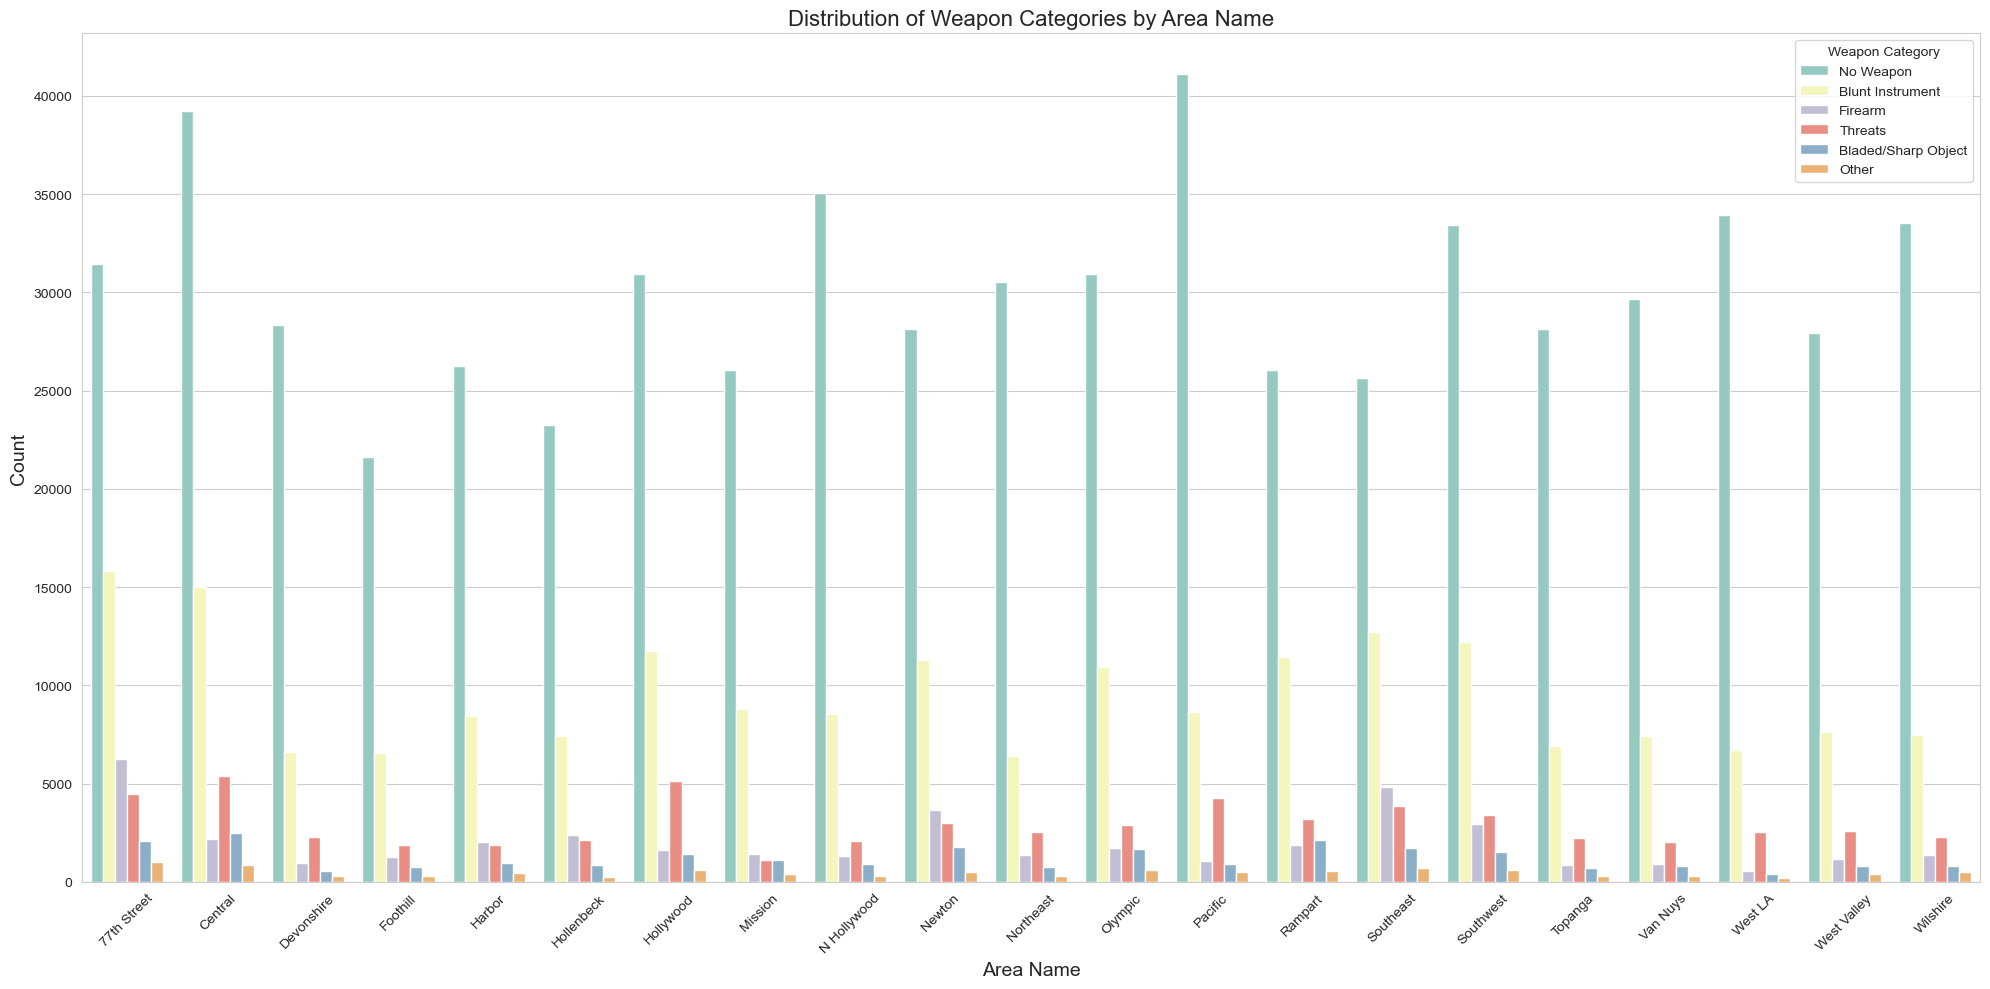

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot size and style
plt.figure(figsize=(20, 10))

# Plotting a bar chart
sns.barplot(x='area_name', y='count', hue='weapon_category', data=weapon_by_area_sorted)

# Setting the title and labels
plt.title('Distribution of Weapon Categories by Area Name', fontsize=16)
plt.xlabel('Area Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Weapon Category', loc='upper right')

plt.tight_layout()
plt.show()

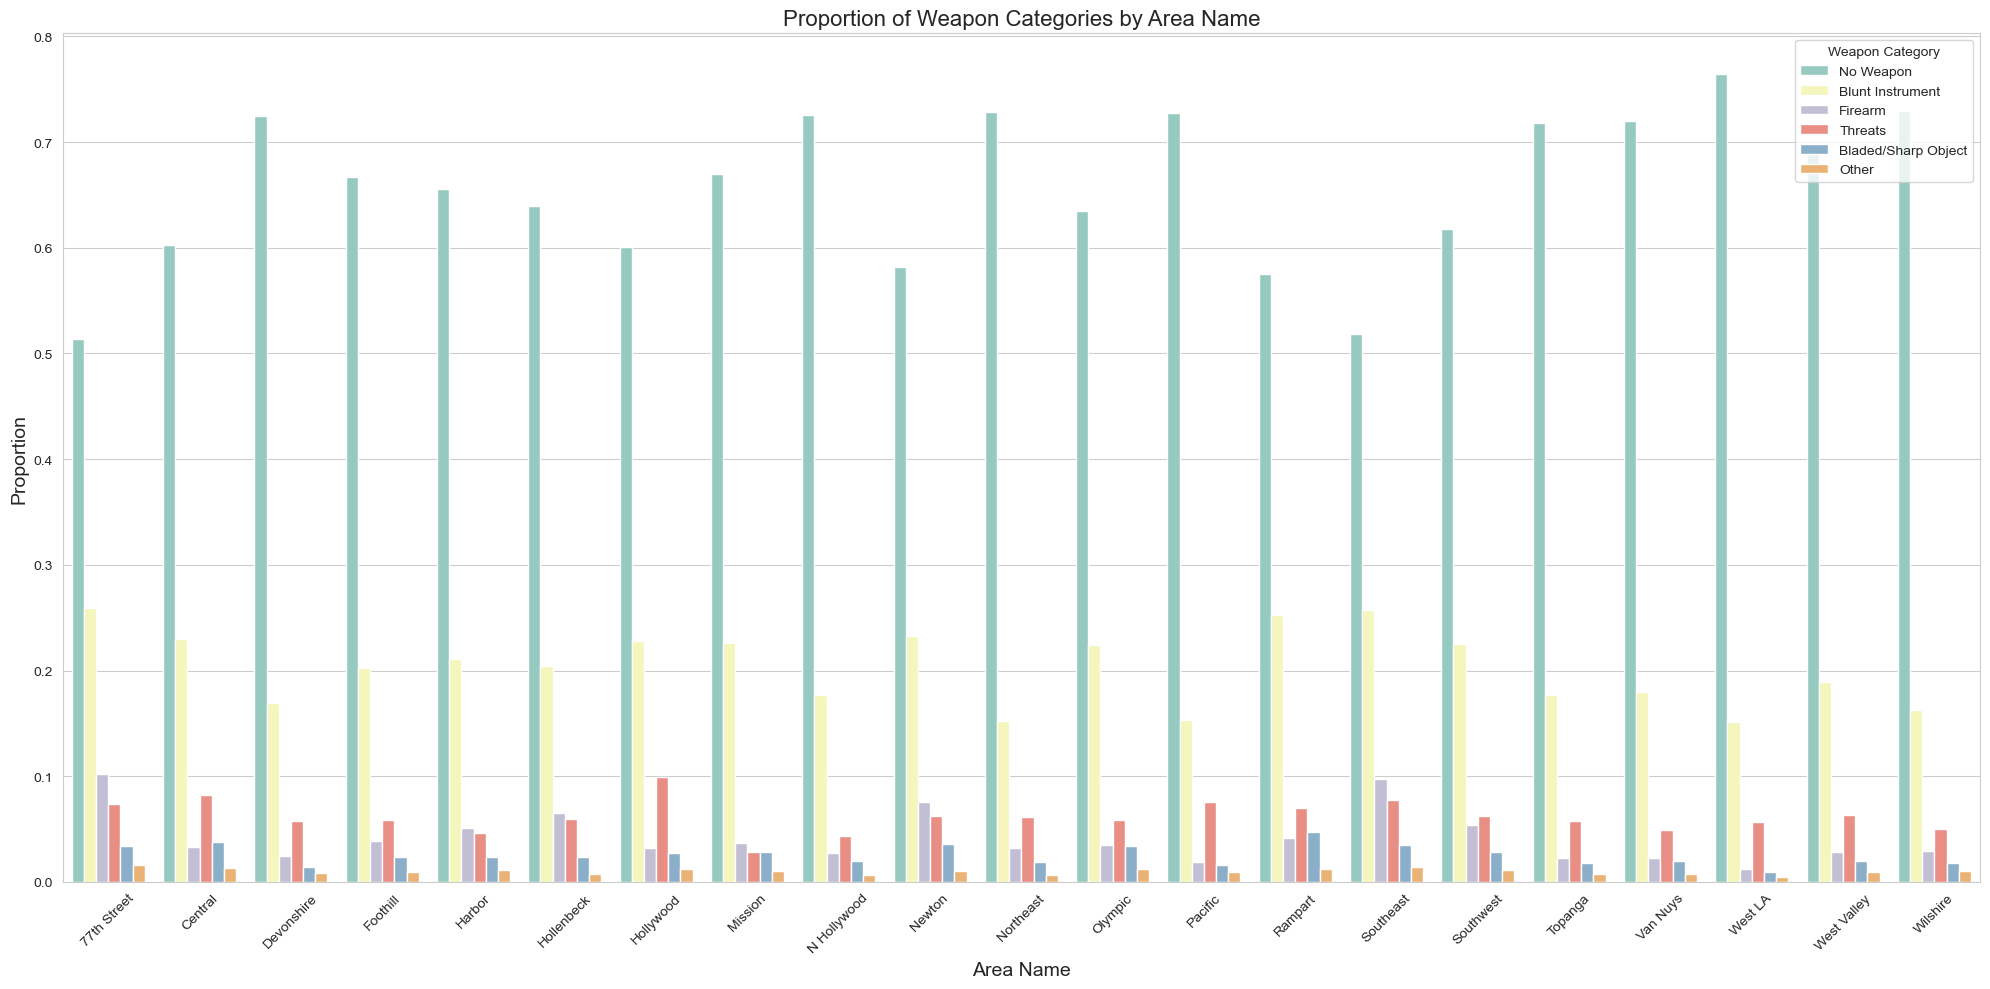

In [133]:
# Setting up the plot size and style
plt.figure(figsize=(20, 10))

# Plotting a bar chart for proportions
sns.barplot(x='area_name', y='proportion', hue='weapon_category', data=weapon_by_area_proportion_sorted)

# Setting the title and labels
plt.title('Proportion of Weapon Categories by Area Name', fontsize=16)
plt.xlabel('Area Name', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Weapon Category', loc='upper right')

plt.tight_layout()
plt.show()

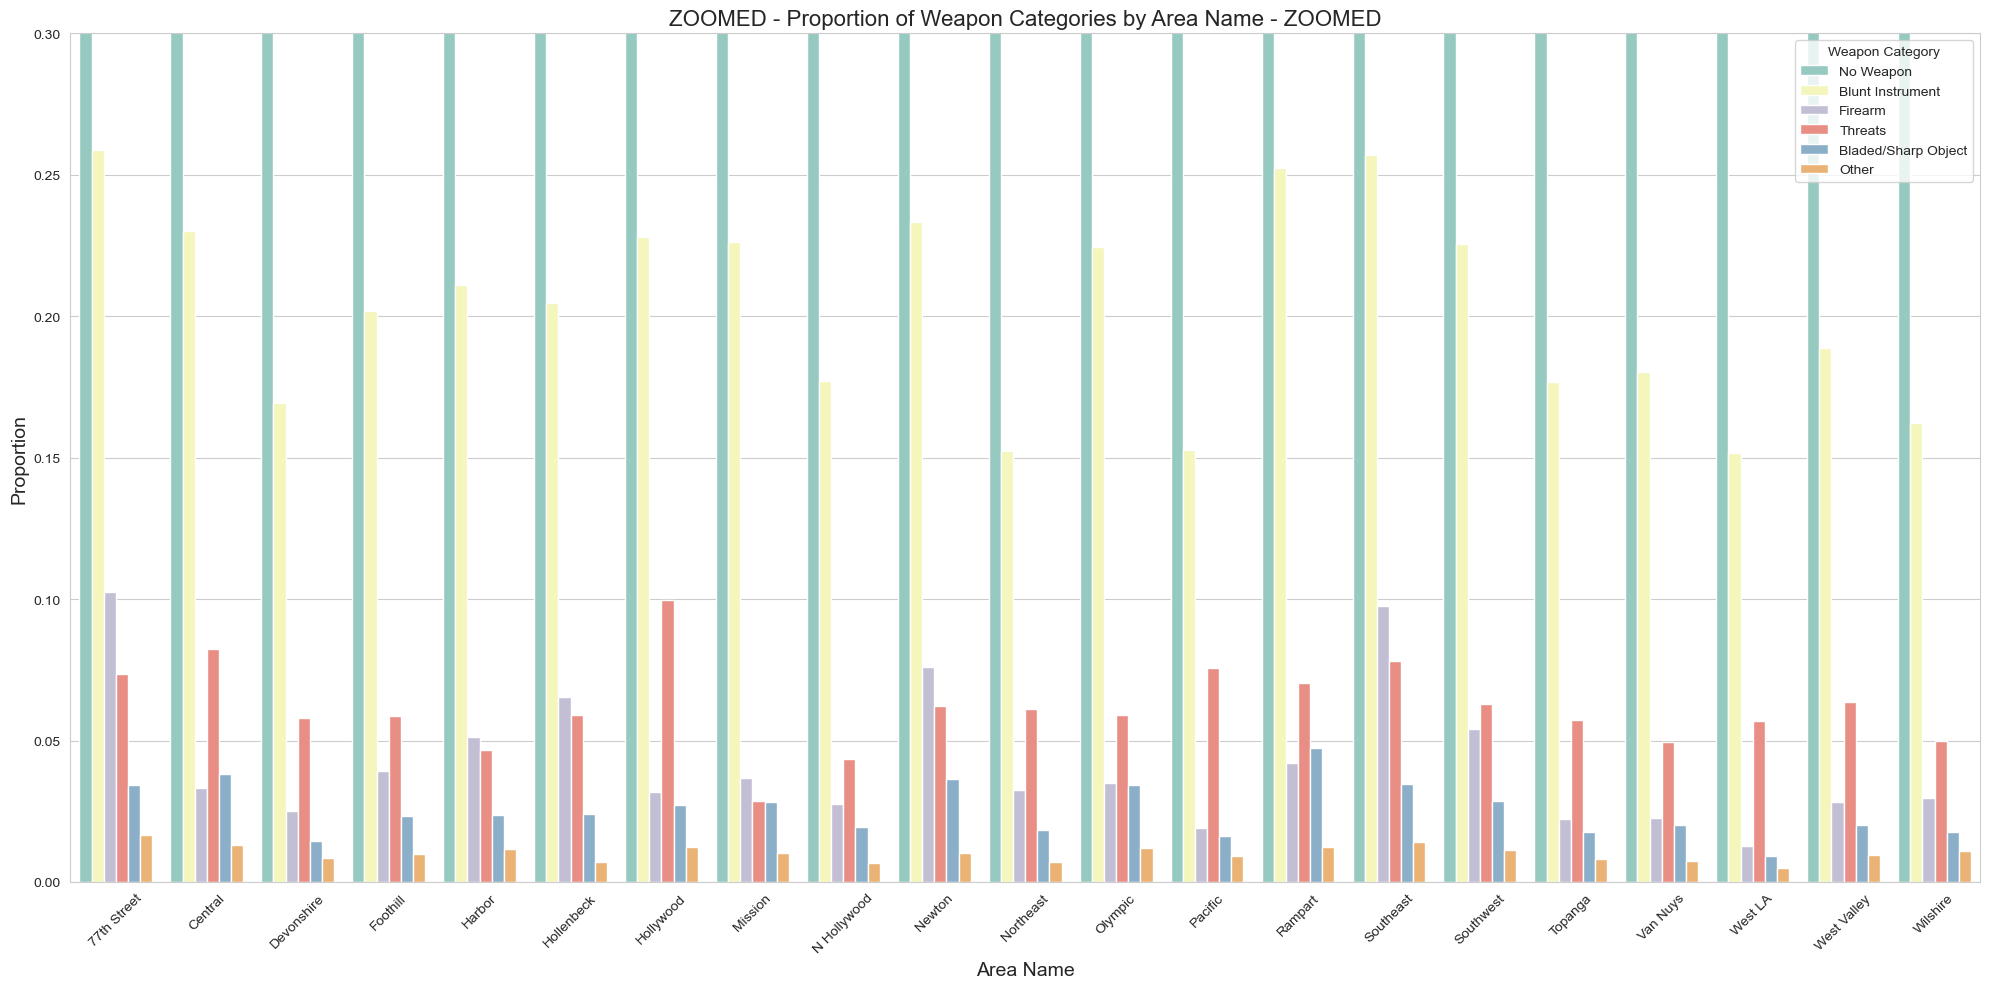

In [135]:
# Setting up the plot size and style
plt.figure(figsize=(20, 10))

# Plotting a bar chart for proportions
sns.barplot(x='area_name', y='proportion', hue='weapon_category', data=weapon_by_area_proportion_sorted)

# Setting the title and labels
plt.title('ZOOMED - Proportion of Weapon Categories by Area Name - ZOOMED', fontsize=16)
plt.xlabel('Area Name', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Weapon Category', loc='upper right')
# Zoom in on y to 0.3
plt.ylim(0, 0.3)

plt.tight_layout()
plt.show()

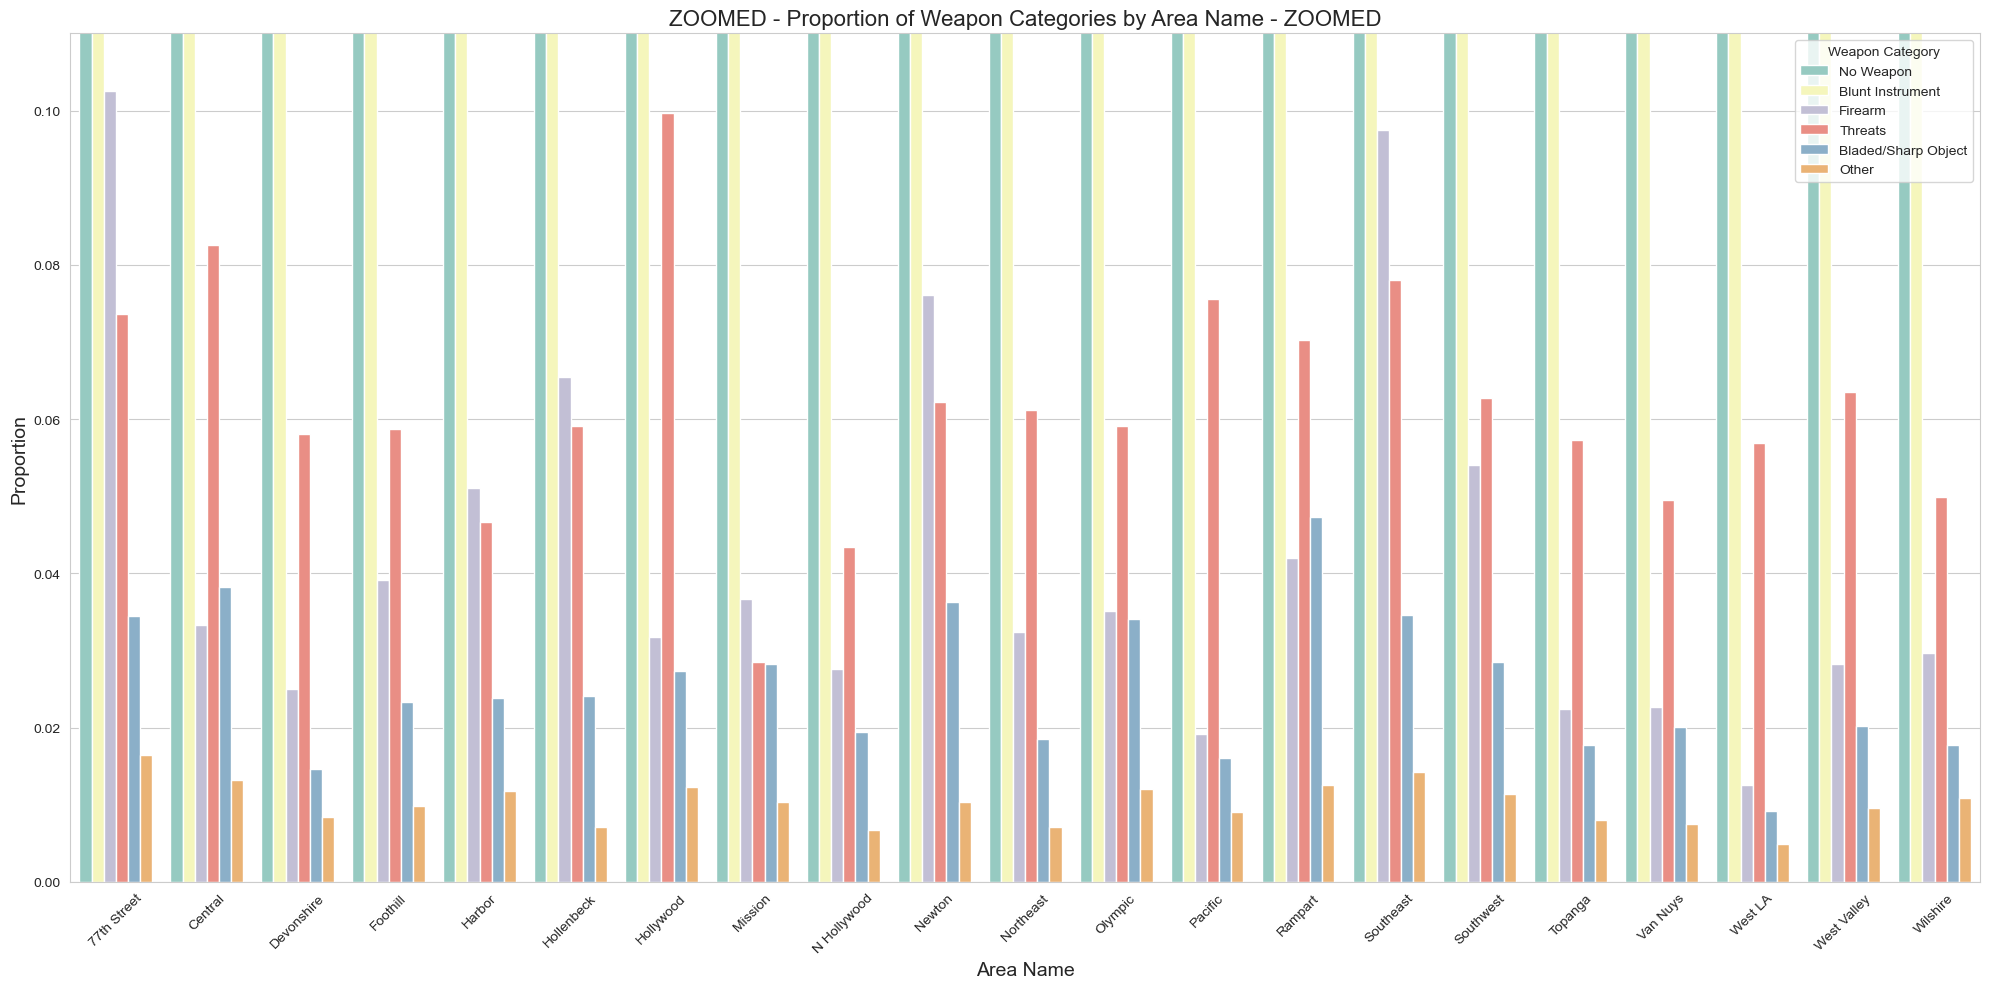

In [137]:
# Setting up the plot size and style
plt.figure(figsize=(20, 10))

# Plotting a bar chart for proportions
sns.barplot(x='area_name', y='proportion', hue='weapon_category', data=weapon_by_area_proportion_sorted)

# Setting the title and labels
plt.title('ZOOMED - Proportion of Weapon Categories by Area Name - ZOOMED', fontsize=16)
plt.xlabel('Area Name', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Weapon Category', loc='upper right')
# Zoom in on y to 0.11
plt.ylim(0, 0.11)

plt.tight_layout()
plt.show()

---

### Temporal Exploration

Text(0.5, 1.0, 'Crime Occurance by Year and Month')

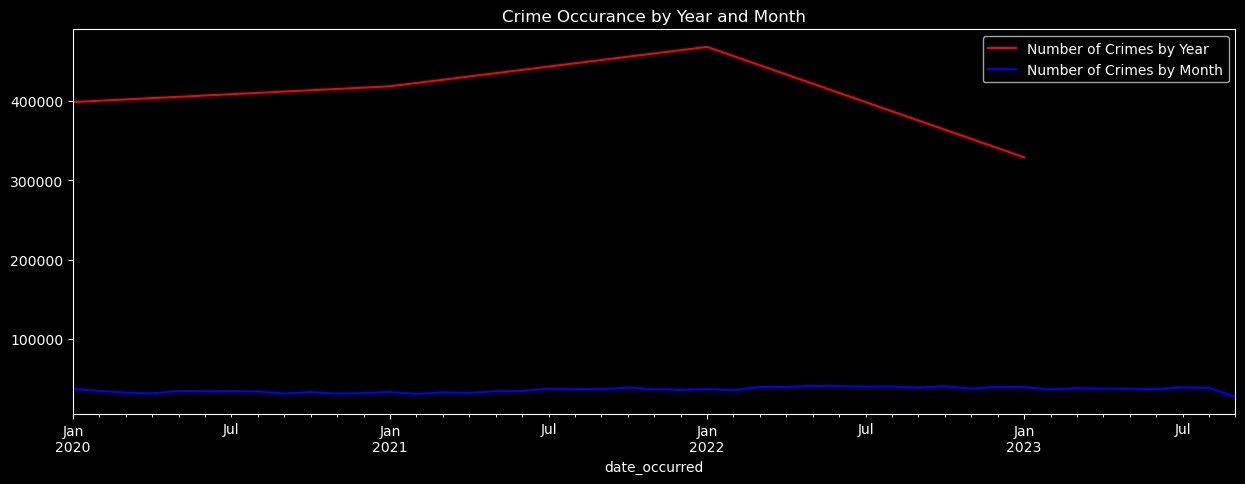

In [36]:
# Plot the crime count by year, month
data.resample("Y").size().plot(
    figsize=(15, 5), label="Number of Crimes by Year", color="red"
)
data.resample("M").size().plot(
    figsize=(15, 5), label="Number of Crimes by Month", color="blue"
)
plt.legend()
plt.title('Crime Occurance by Year and Month')

Text(0.5, 1.0, 'Crime Occurance by Week and Day')

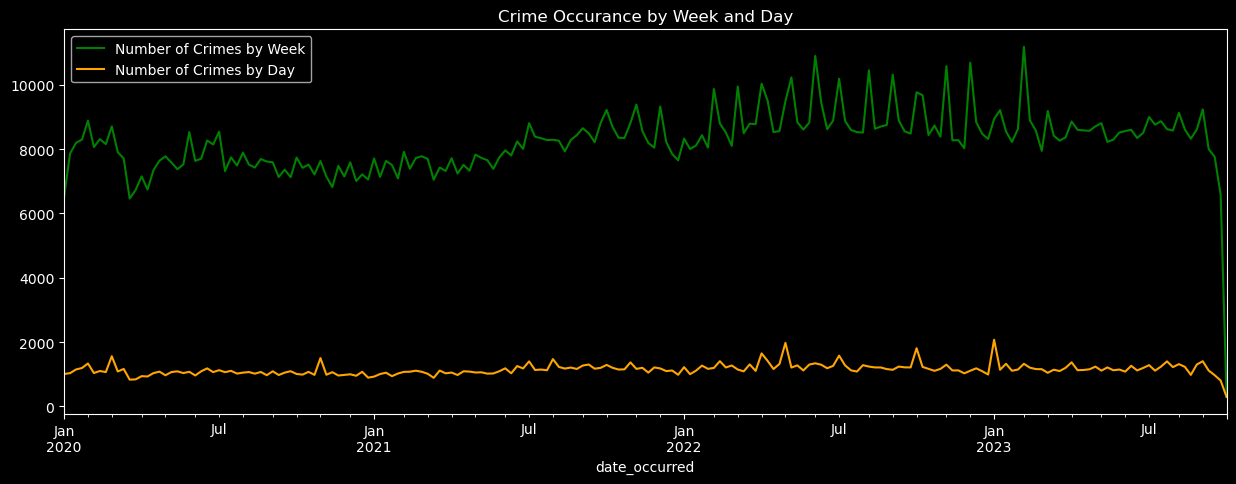

In [37]:
# Plot the crime count by week, day

data.resample("W").size().plot(
    figsize=(15, 5), label="Number of Crimes by Week", color="green"
)
data.resample("D").size().plot(
    figsize=(15, 5), label="Number of Crimes by Day", color="orange"
)
plt.legend()
plt.title('Crime Occurance by Week and Day')

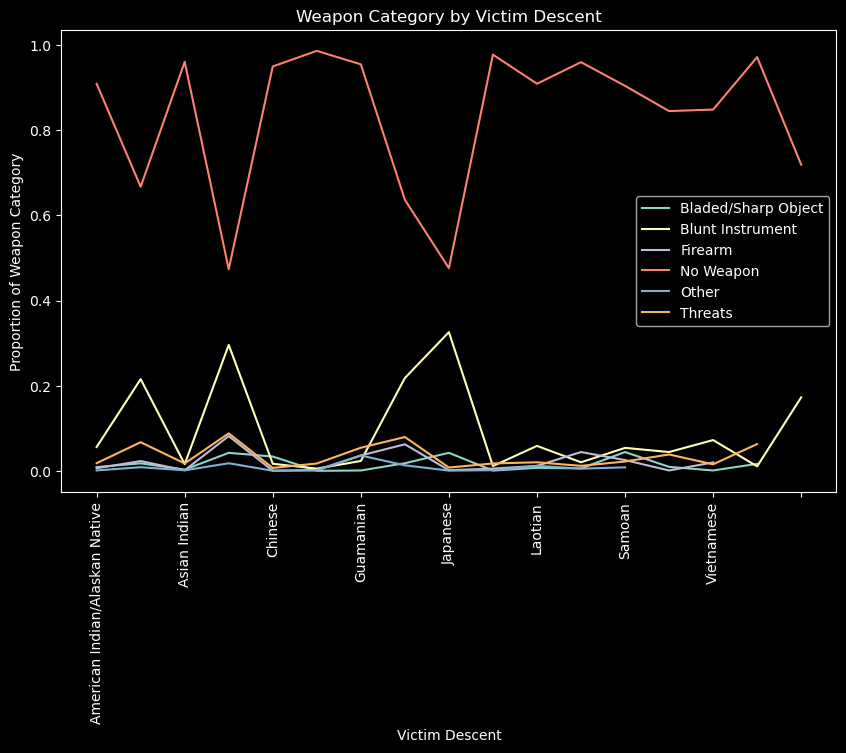

In [35]:
# Group the data by victim descent and weapon category
grouped_data = (
    data.groupby(["victim_descent", "weapon_category"]).size().reset_index(name="count")
)

# Calculate the total count of each victim descent
total_counts = grouped_data.groupby("victim_descent")["count"].sum()

# Calculate the proportion of each weapon category for each victim descent
grouped_data["proportion"] = grouped_data.apply(
    lambda row: row["count"] / total_counts[row["victim_descent"]], axis=1
)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
for key, grp in grouped_data.groupby("weapon_category"):
    ax = grp.plot(ax=ax, kind="line", x="victim_descent", y="proportion", label=key)
ax.set_xlabel("Victim Descent")
# Make x label vertical
plt.xticks(rotation=90)
ax.set_ylabel("Proportion of Weapon Category")
ax.set_title("Weapon Category by Victim Descent")
plt.show()

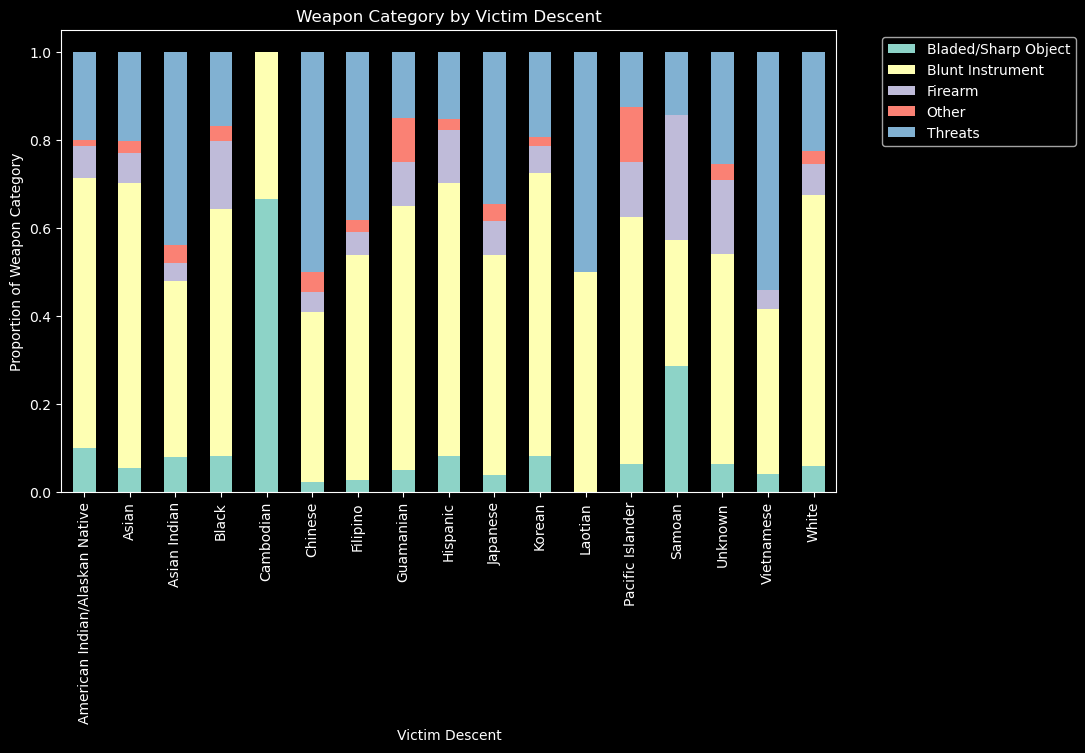

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Make a DF with no 'No Weapon'
data_no_no_weapon = data[data["weapon_description"] != "No Weapon"]

# Group the data by victim descent and weapon category
grouped_data = data_no_no_weapon.groupby(["victim_descent", "weapon_category"]).size().reset_index(name="count")

# Calculate the total count of each victim descent
total_counts = grouped_data.groupby("victim_descent")["count"].sum()

# Calculate the proportion of each weapon category for each victim descent
grouped_data["proportion"] = grouped_data.apply(lambda row: row["count"] / total_counts[row["victim_descent"]], axis=1)

# Pivot the data to make it easier to plot
pivoted_data = grouped_data.pivot(index="victim_descent", columns="weapon_category", values="proportion")

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
pivoted_data.plot(kind="bar", stacked=True, ax=ax)
ax.set_xlabel("Victim Descent")
# Make x label vertical
plt.xticks(rotation=90)
ax.set_ylabel("Proportion of Weapon Category")
ax.set_title("Weapon Category by Victim Descent")
# Move the label to off chart
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
data

,date_reported,time_occurred,area_name,part_1_2,crime_code_description,victim_age,vict_sex,vict_descent,weapon_desc,status_desc,location,lat,lon,area_,weapon_category,time_occurred_rounded
date_occurred,,,,,,,,,,,,,,,,
2010-01-01,2013-07-31,21:45:00,Southeast,2,THEFT OF IDENTITY,29,F,Black,No Weapon,Invest Cont,12000 S BROADWAY,33.9237,-118.2782,18.0,No Weapon,21:00:00
2010-01-01,2012-12-14,08:00:00,Wilshire,2,CHILD ANNOYING (17YRS & UNDER),7,F,Hispanic,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,1700 VINEYARD AV,34.0441,-118.3382,7.0,Blunt Instrument,08:00:00
2010-01-01,2010-01-01,00:15:00,Topanga,1,ROBBERY,21,M,Unknown,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,22900 VALERIO ST,34.2042,-118.6262,21.0,Blunt Instrument,00:00:00
2010-01-01,2014-08-22,08:00:00,Central,2,THEFT OF IDENTITY,84,F,Unknown,No Weapon,Invest Cont,200 S OLIVE ST,34.0538,-118.2488,1.0,No Weapon,08:00:00
2010-01-01,2013-01-21,12:00:00,Hollenbeck,2,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,6,F,Hispanic,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,WHITTIER BL,34.0328,-118.2121,4.0,Blunt Instrument,12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,2023-09-25,12:45:00,Rampart,1,INTIMATE PARTNER - AGGRAVATED ASSAULT,0,NaN,Unknown,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1600 W 2ND ST,34.0627,-118.2652,NaN,Blunt Instrument,12:00:00
2023-09-25,2023-09-25,07:00:00,77th Street,1,VEHICLE - STOLEN,0,NaN,Unknown,No Weapon,Invest Cont,5900 S WESTERN AV,33.9875,-118.3089,NaN,No Weapon,07:00:00
2023-09-25,2023-09-25,03:30:00,Harbor,2,TRESPASSING,57,F,Hispanic,No Weapon,Invest Cont,24700 BROAD AV,33.8020,-118.2622,NaN,No Weapon,03:00:00


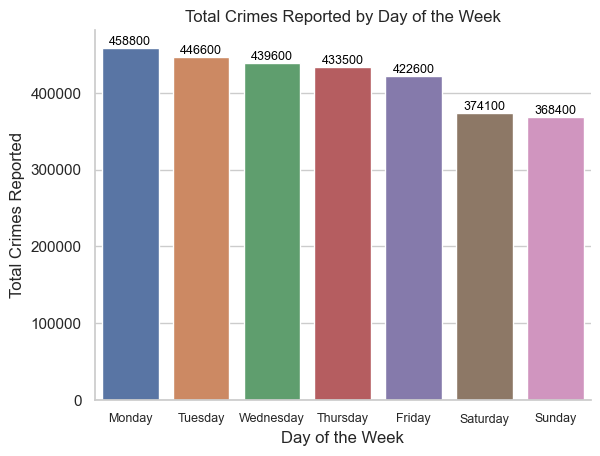

In [ ]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x="Day", y="Crime", hue="Variable", data=dayrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Day")
ax.set_xticklabels(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    fontsize=9,
)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        p.get_height(),
        "%d" % round(int(p.get_height()), -2),
        fontsize=9,
        color="black",
        ha="center",
        va="bottom",
    )
sns.despine(fig)

<div style="background-color: #; padding: 0px; color: #18C0C4;">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → </i></font> <font color='white' size='10'><i>**Model**</i></font> <font size='5'><i>→ Deliver</i></font>

<div style="background-color: #; padding: 0px; color: #18C0C4;">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → Model → </i></font> <font color='white' size='10'><i>**Deliver**</i></font>